In [1]:
from dotenv import load_dotenv
import openai
import os
from openai import AzureOpenAI
from IPython.display import display, HTML, JSON, Markdown, Image
import base64 

load_dotenv()
AZURE_OPENAI_ENDPOINT=os.getenv("AISTUDIO_AZURE_OPENAI_ENDPOINT")
AZURE_OPENAI_GPT4o_DEPLOYMENT=os.getenv("AI_STUDIO_AZURE_OPENAI_GPT4o_DEPLOYMENT")
AZURE_OPENAI_API_VERSION="2024-02-01"
AZURE_OPENAI_KEY=os.getenv("AISTUDIO_AZURE_OPENAI_KEY")

client = openai.AzureOpenAI(
        azure_endpoint=AZURE_OPENAI_ENDPOINT,
        api_key=AZURE_OPENAI_KEY,
        api_version=AZURE_OPENAI_API_VERSION
)

In [2]:
def call_openAI(text):
    response = client.chat.completions.create(
        model=AZURE_OPENAI_GPT4o_DEPLOYMENT,
        messages = text,
        temperature=0.0
    )
    return response.choices[0].message.content

In [3]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
    
def ask_question(base64_image, question):
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my architecture homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": question},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
    result = call_openAI(messages)
    return result

#### Identifying hazardous objects and situations

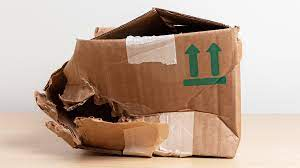

In [4]:
IMAGE_PATH = "./data/damaged1.jpg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Is the package damaged? Describe the damage in 1 sentence")
display(HTML(result))

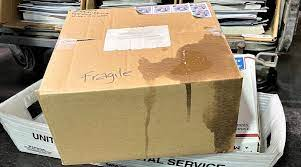

In [5]:
IMAGE_PATH = "./data/damaged4.jpg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Is the package damaged? Describe the damage in 1 sentence")
display(HTML(result))

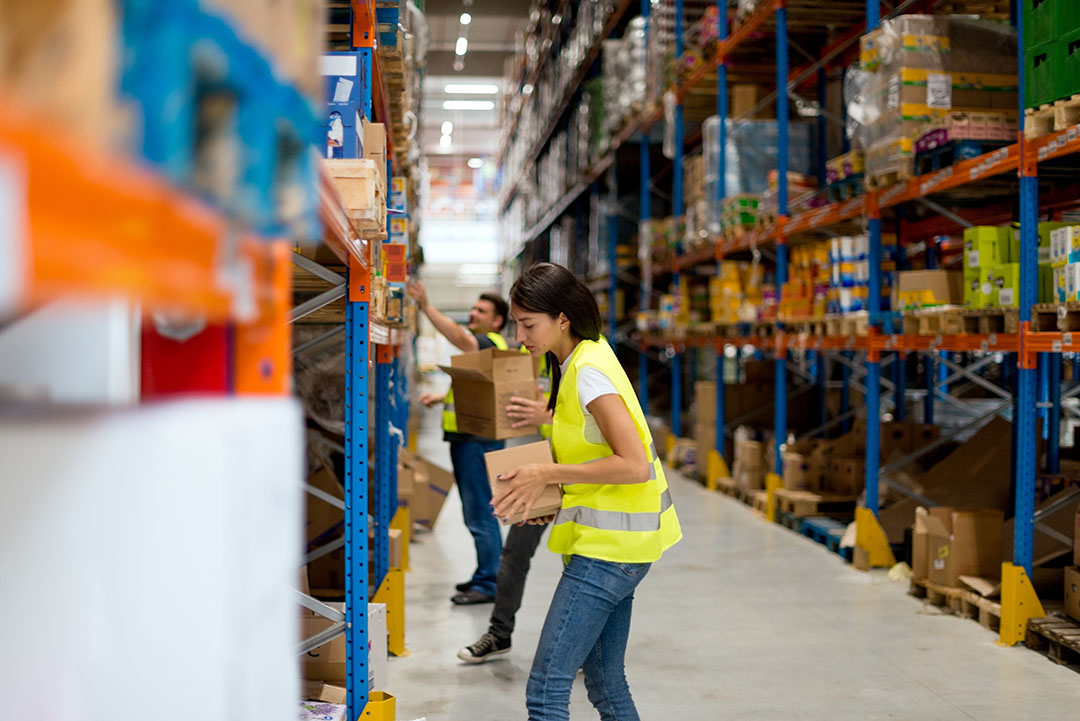

In [6]:
IMAGE_PATH = "./data/hazard1.jpeg"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Do you see any security hazards in this image?")
display(HTML(result))

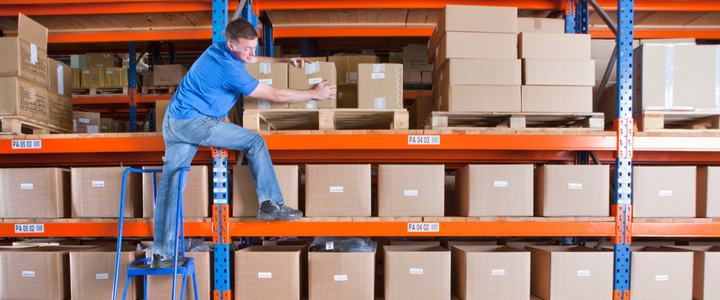

In [7]:
IMAGE_PATH = "./data/hazard2.png"
base64_image = encode_image(IMAGE_PATH)
display(Image(IMAGE_PATH))
result = ask_question(base64_image, "Do you see any security hazards in this image?")
display(HTML(result))